<a href="https://colab.research.google.com/github/vijay7425/ObjectDetectionUsingYOLOv8/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jul 29 01:56:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image


In [9]:
%cd {HOME}
!yolo task=detect mode= predict model=yolov8n.pt conf = 0.25  source = "/content/5.jpg"

/content
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/5.jpg: 640x640 1 microwave, 1 oven, 3 sinks, 1 refrigerator, 10.7ms
Speed: 5.6ms preprocess, 10.7ms inference, 713.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


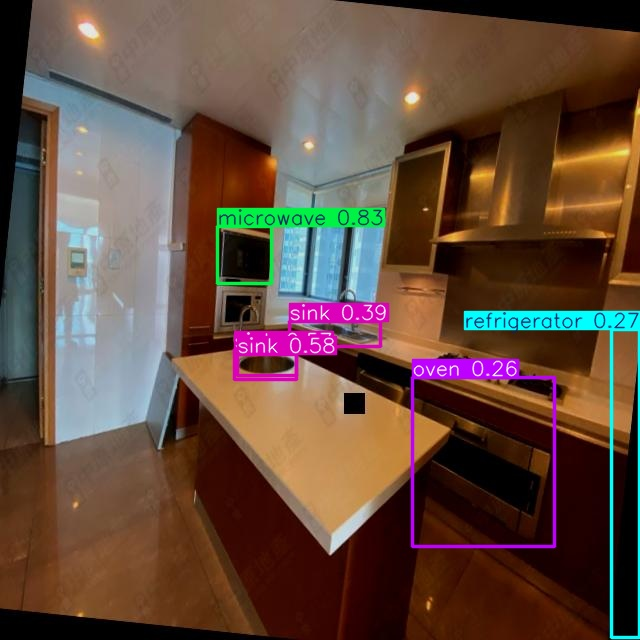

In [ ]:
%cd {HOME}
Image(filename = "/content/runs/detect/predict/5_jpg.rf.9d79e3d40469301f5ceb2898ea34b1f1.jpg", width = 600)

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZKipnfn6mV4PM1lZusBE")
project = rf.workspace("so-d4hcz").project("all_finalize_1")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.68, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to all_finalize_1-1 in yolov8:: 100%|██████████| 5046/5046 [00:00<00:00, 7805.08it/s]


In [13]:
%cd {HOME}

!yolo task=detect mode= train model=yolov8n.pt data=/content/all_finalize_1-1/data.yaml epochs=35 imgsz=640

/content
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/all_finalize_1-1/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [15]:
!ls {HOME}/runs/detect/train3

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1722218660.d4d1eb38ce1a.5196.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2750.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2751.jpg  weights
P_curve.png					    train_batch2752.jpg
PR_curve.png					    train_batch2.jpg


/content


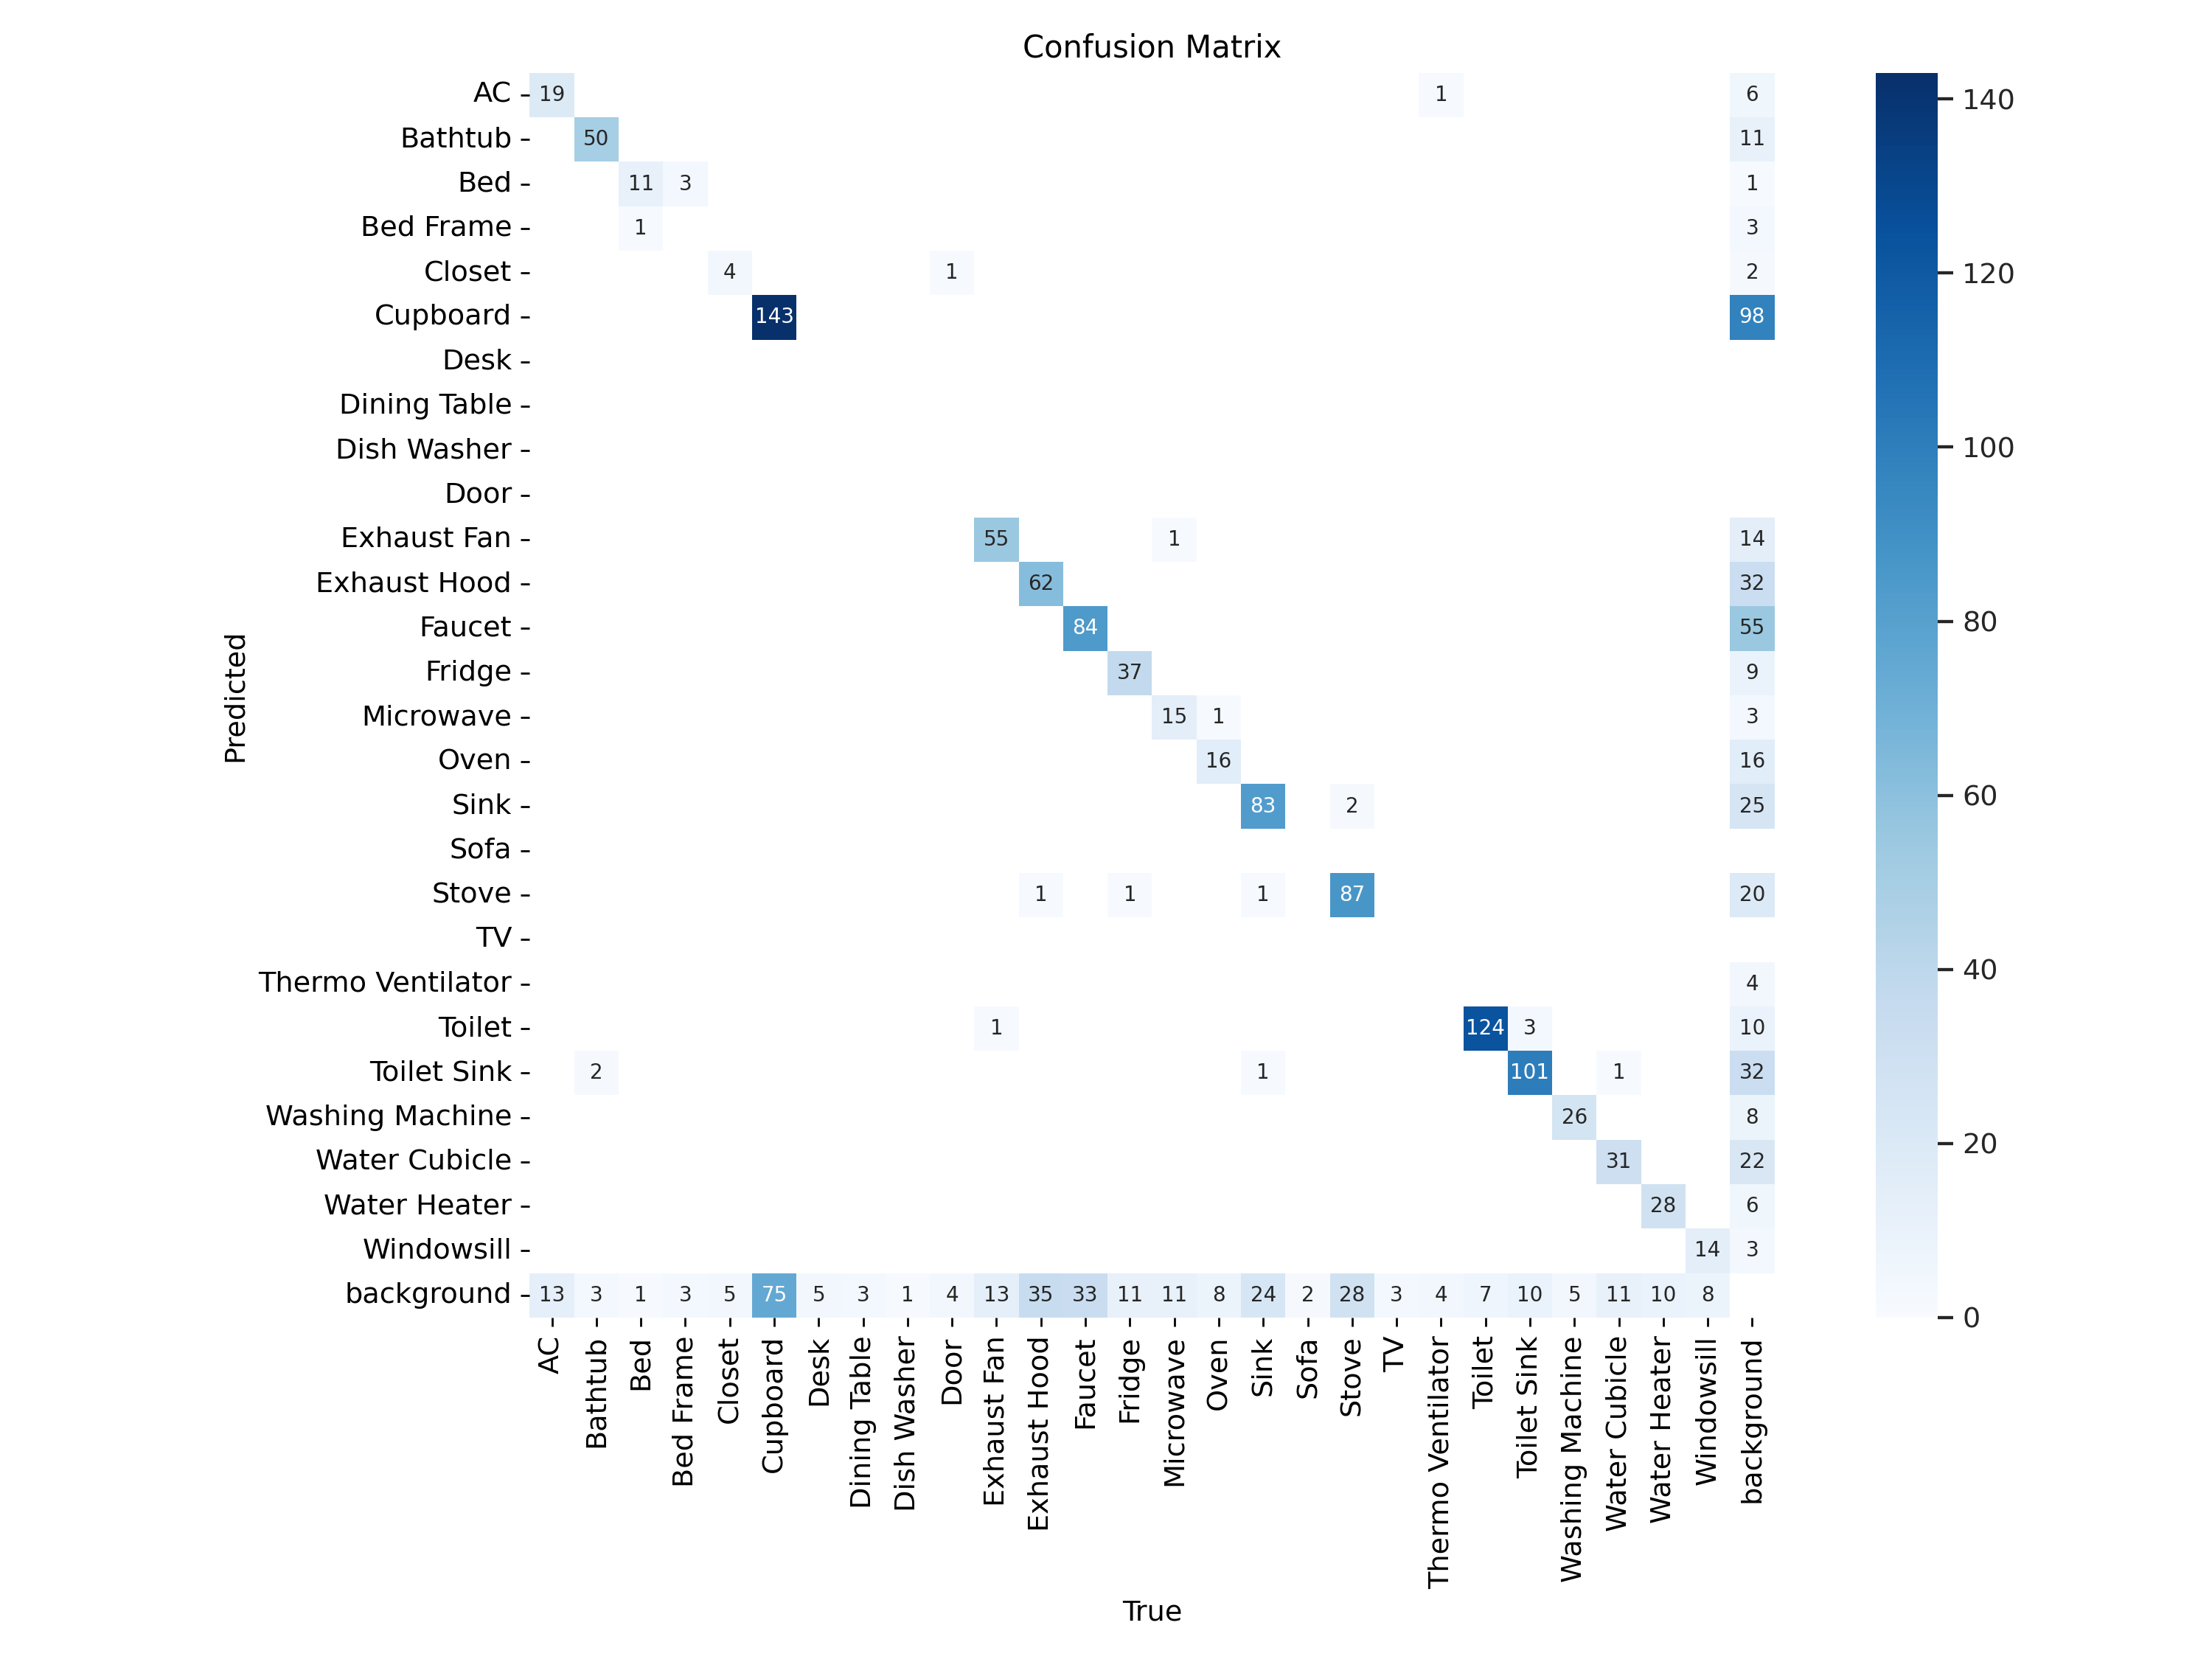

In [16]:
%cd {HOME}
Image(filename = "/content/runs/detect/train3/confusion_matrix.png", width = 600)

/content


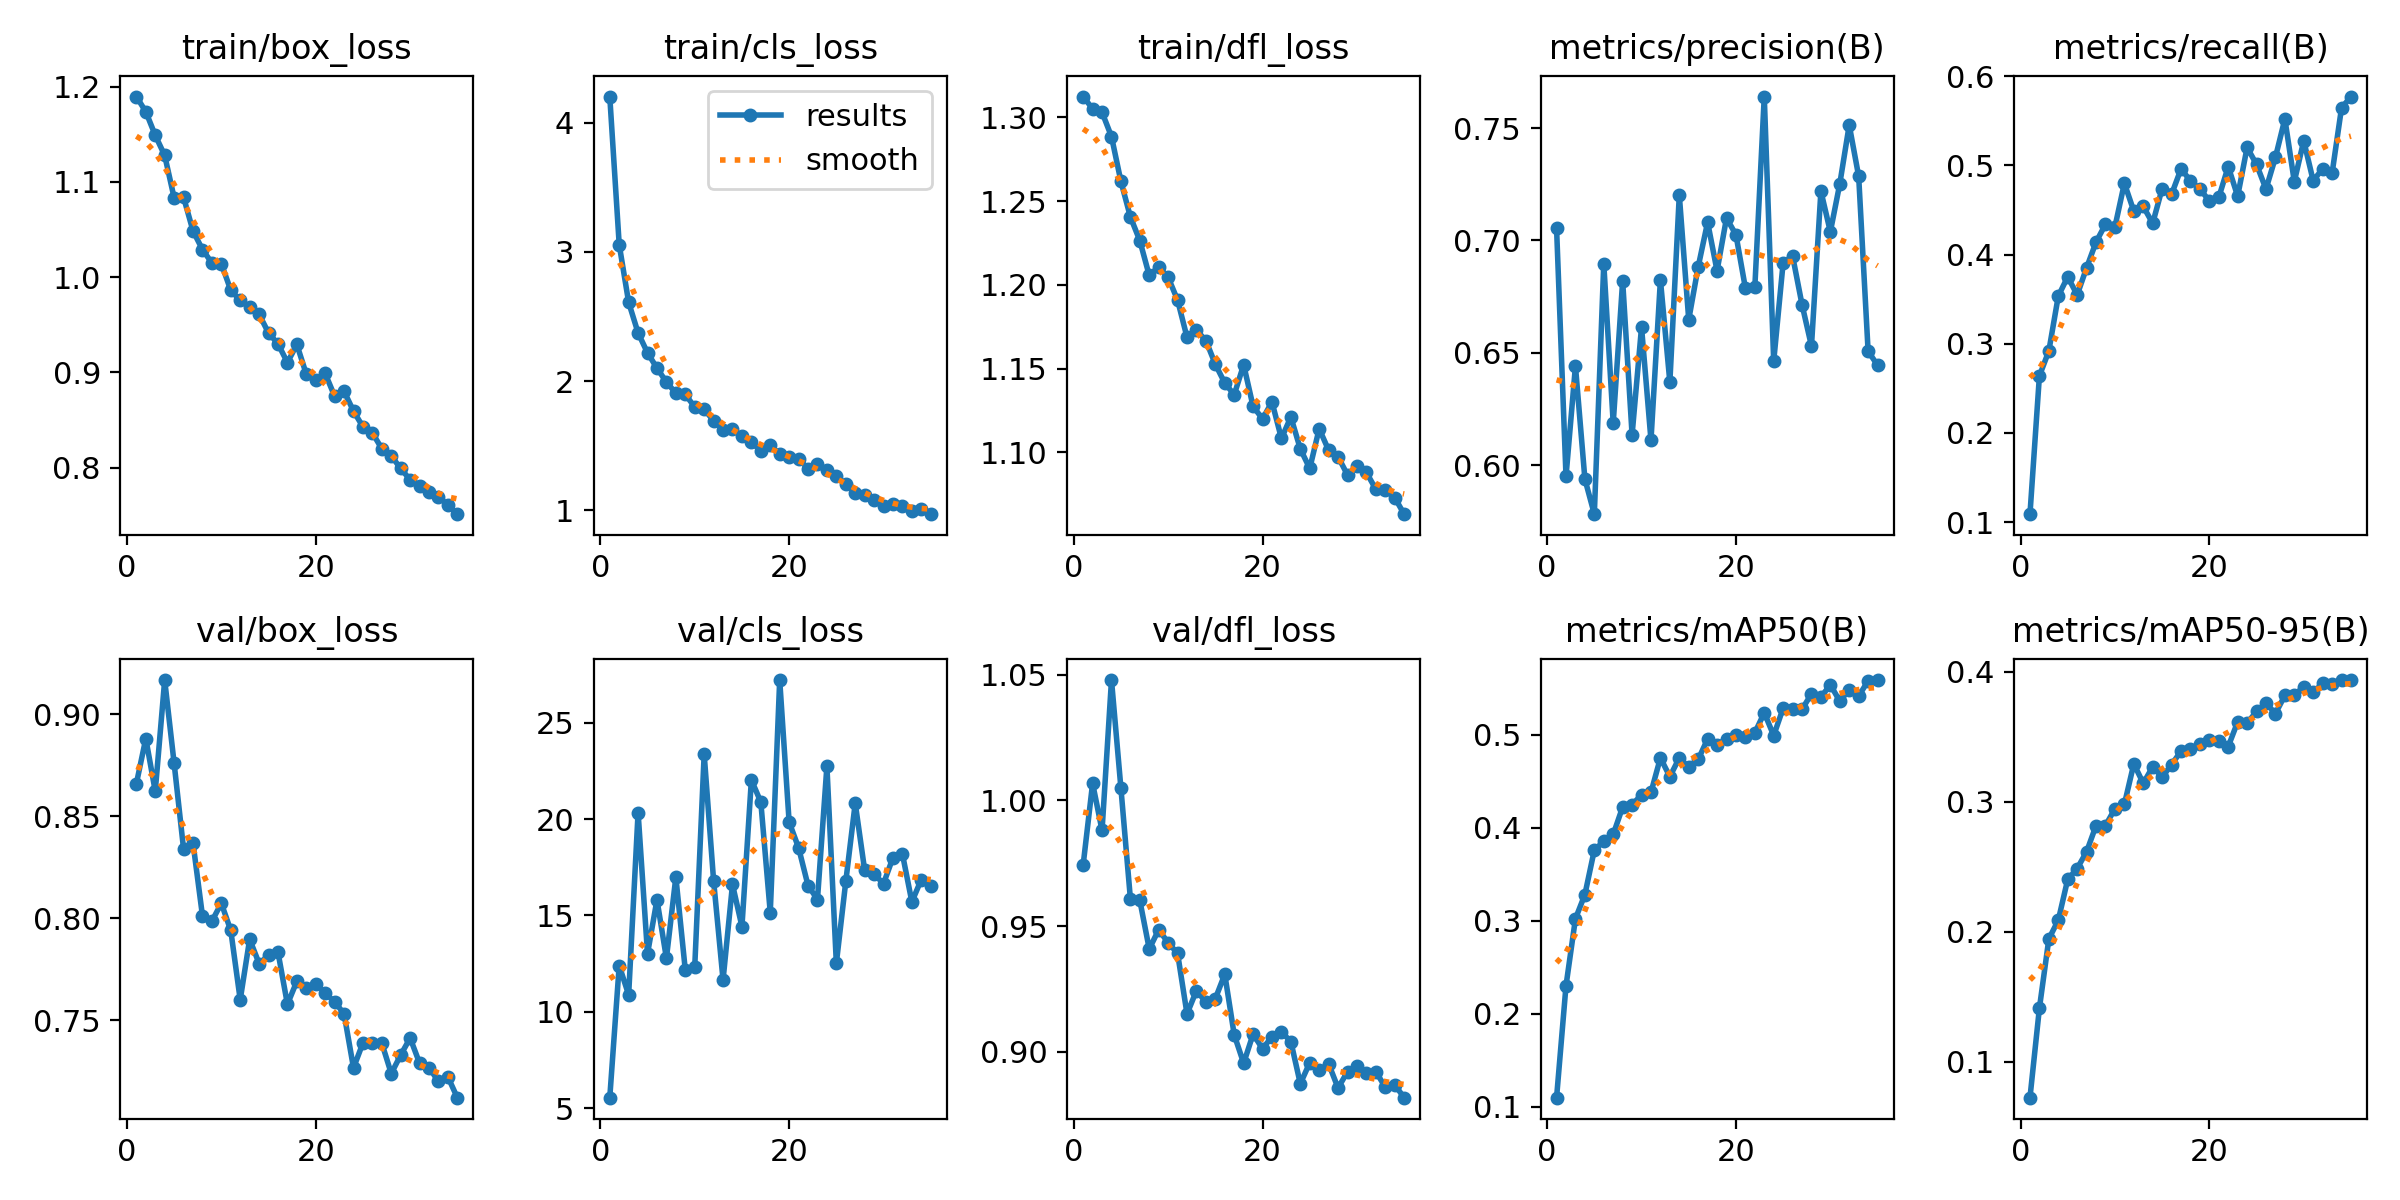

In [17]:
%cd {HOME}
Image(filename = "/content/runs/detect/train3/results.png", width = 600)

/content


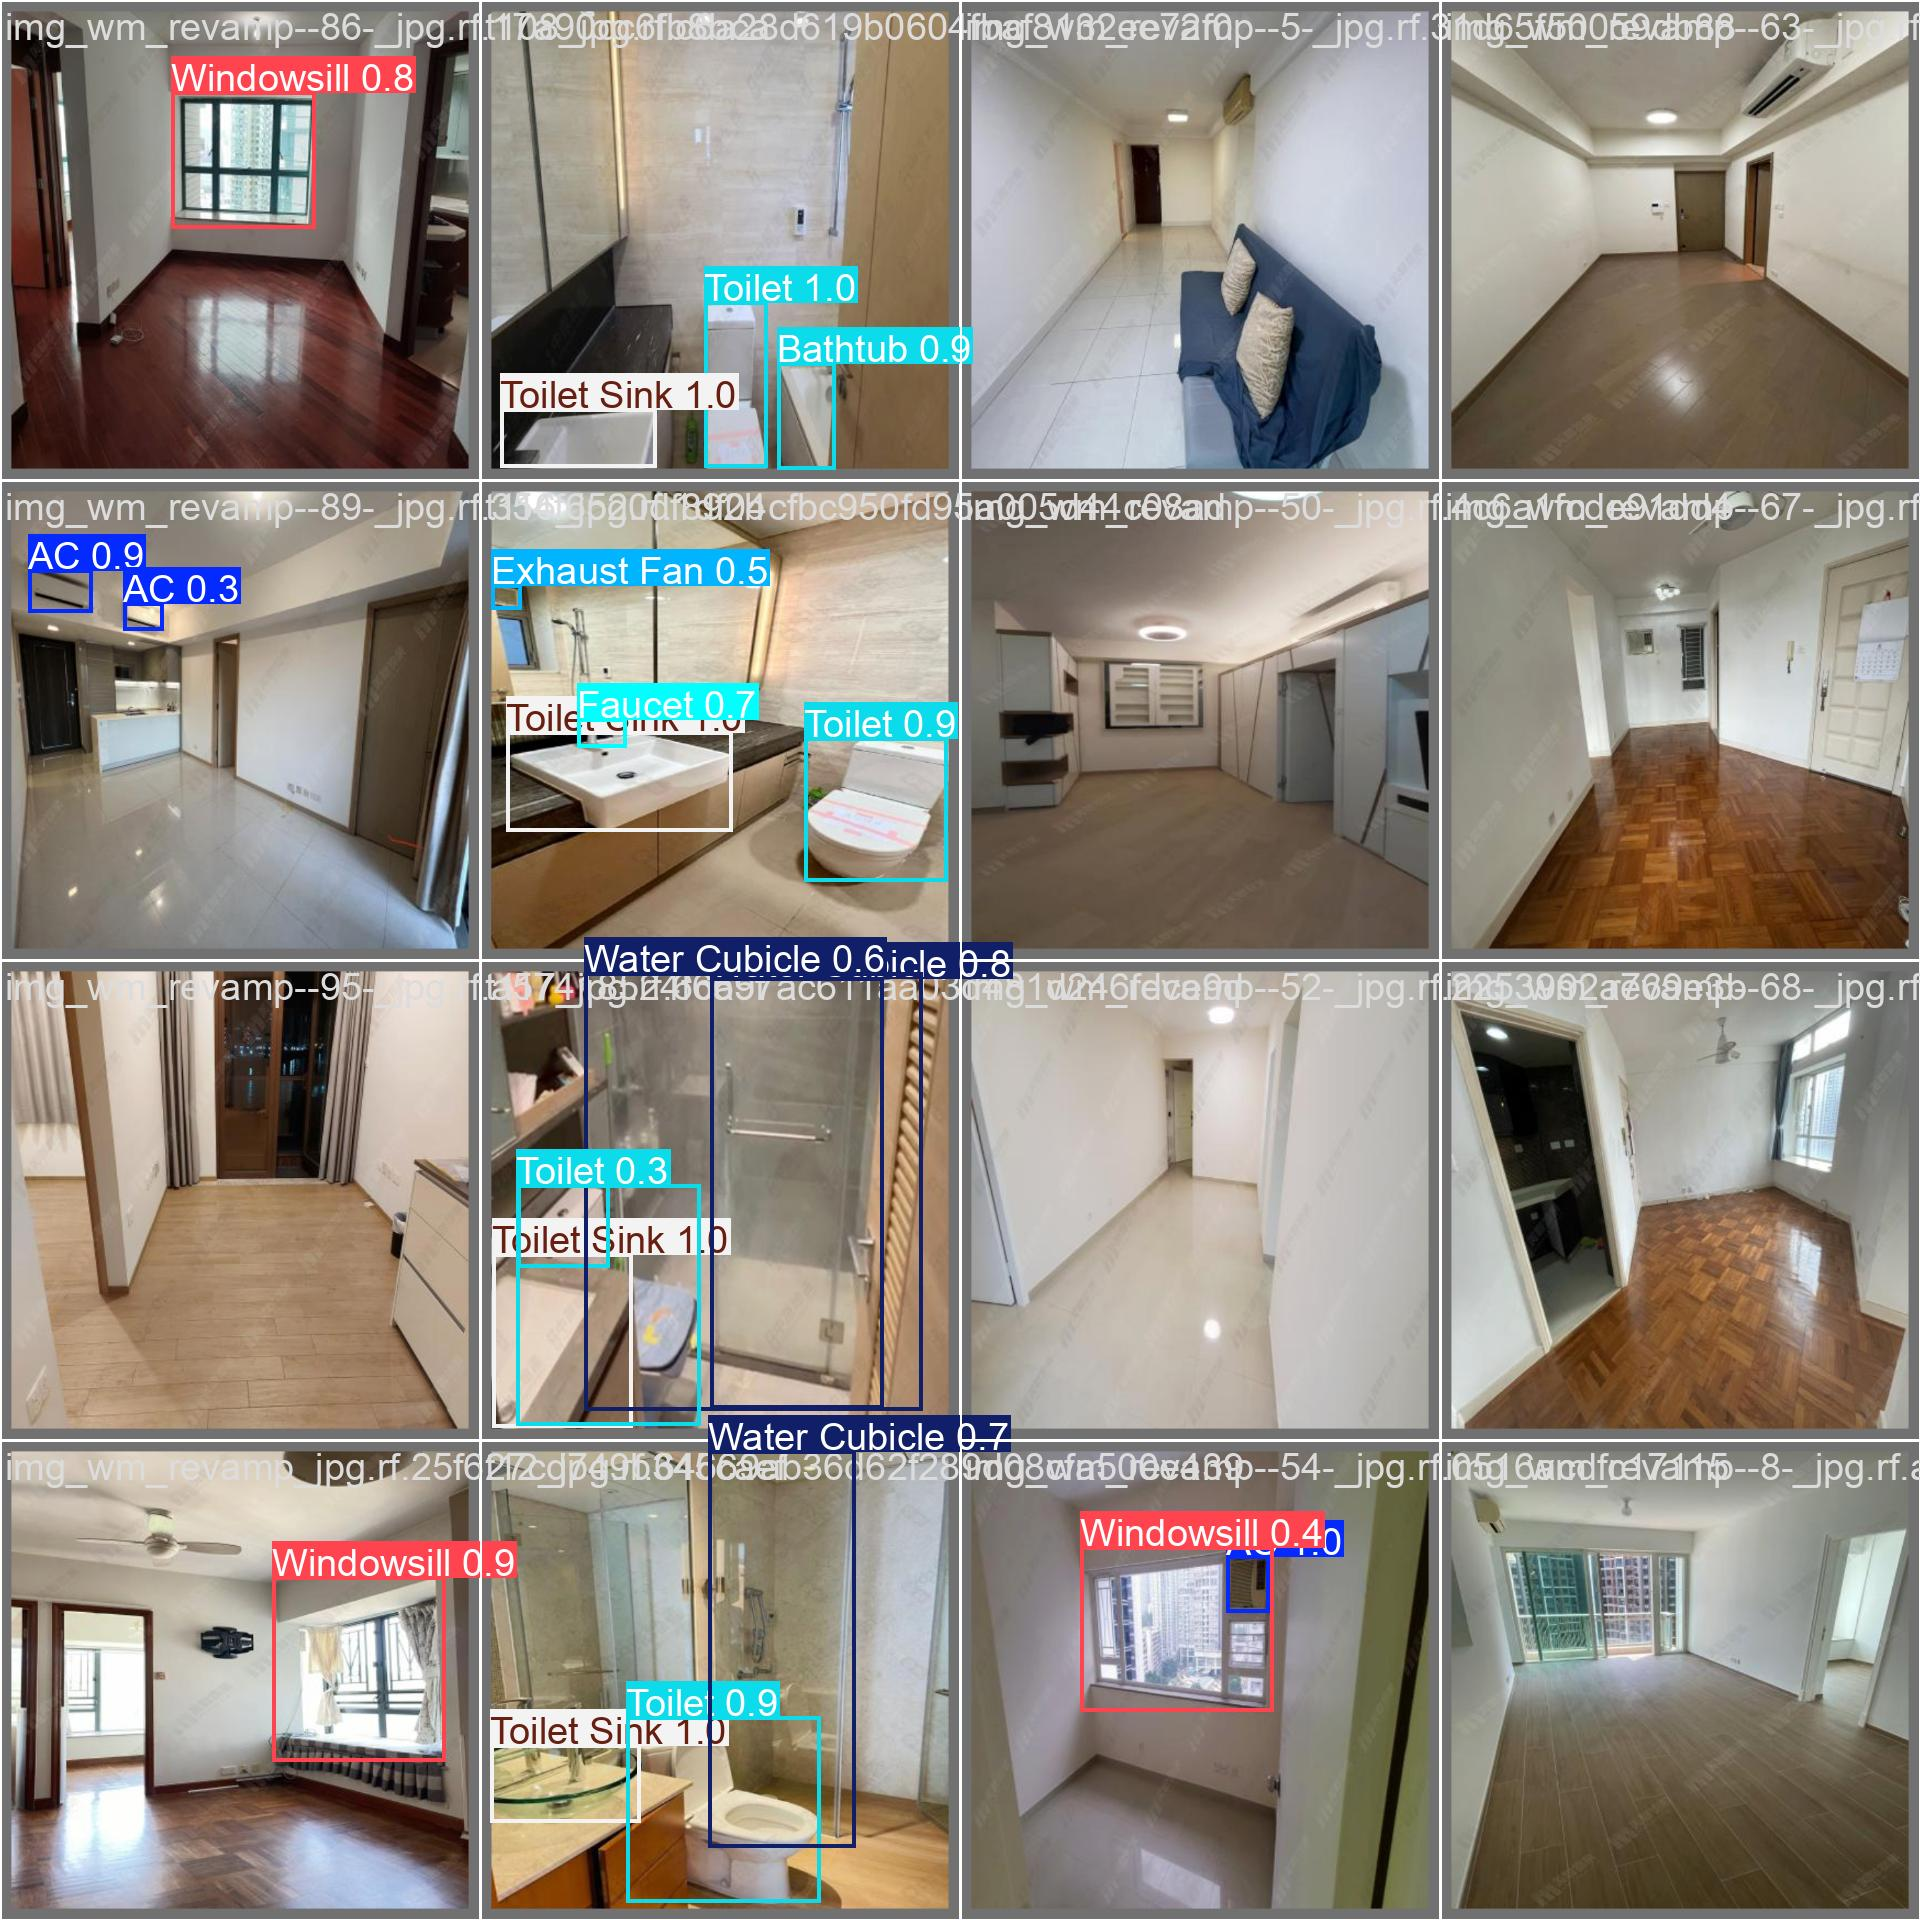

In [18]:
%cd {HOME}
Image(filename = "/content/runs/detect/train3/val_batch0_pred.jpg", width = 600)

validate custom model

In [20]:
%cd {HOME}
!yolo task=detect mode= val model=/content/runs/detect/train3/weights/best.pt data=/content/all_finalize_1-1/data.yaml

/content
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,010,913 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/all_finalize_1-1/valid/labels.cache... 503 images, 176 backgrounds, 0 corrupt: 100% 503/503 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:09<00:00,  3.32it/s]
                   all        503       1347       0.65      0.565      0.559      0.394
                    AC         31         32      0.258      0.594      0.477      0.375
               Bathtub         55         55      0.777      0.927      0.873       0.73
                   Bed         13         13      0.684      0.923      0.883      0.581
             Bed Frame          5          6      0.418        0.5      0.598       0.35
                Closet          9          9      0.368      0.444      0.424       0.33
              Cupboard        1

Inference with Custom model

In [21]:
%cd {HOME}
!yolo task=detect mode= predict model=/content/runs/detect/train3/weights/best.pt conf = 0.25  source = {dataset.location}/test/images

/content
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,010,913 parameters, 0 gradients, 8.1 GFLOPs

image 1/260 /content/all_finalize_1-1/test/images/108_jpg.rf.5229a5d43e925e0a4e73eb56d7a7dfc8.jpg: 640x640 2 Cupboards, 1 Exhaust Hood, 1 Sink, 1 Stove, 1 Toilet Sink, 10.4ms
image 2/260 /content/all_finalize_1-1/test/images/119_jpg.rf.6ca198b3ee5cb687a7cd91add41f1a10.jpg: 640x640 2 Cupboards, 1 Exhaust Fan, 1 Faucet, 1 Sink, 1 Stove, 7.4ms
image 3/260 /content/all_finalize_1-1/test/images/124_jpg.rf.66958b98e74d690766aac3f0952eda96.jpg: 640x640 2 Cupboards, 1 Exhaust Fan, 1 Faucet, 1 Sink, 1 Stove, 7.3ms
image 4/260 /content/all_finalize_1-1/test/images/12_jpg.rf.1852926f5703c81f3e76852b3ba501b8.jpg: 640x640 1 Cupboard, 2 Exhaust Hoods, 2 Faucets, 1 Oven, 1 Sink, 1 Stove, 7.4ms
image 5/260 /content/all_finalize_1-1/test/images/141_jpg.rf.59bce75b4e519f82b08577d88123c032.jpg: 640x640 3 Cupboards, 1 Exhaust Fan,

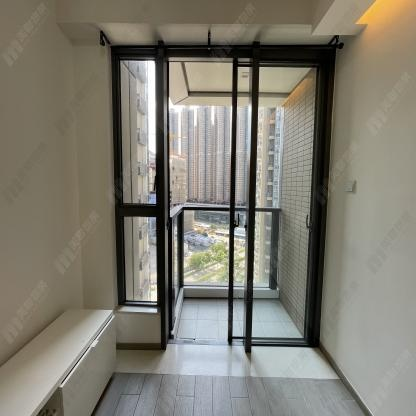

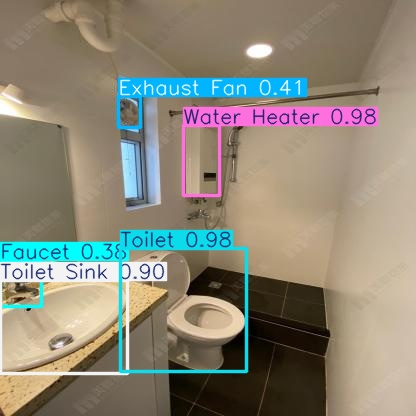

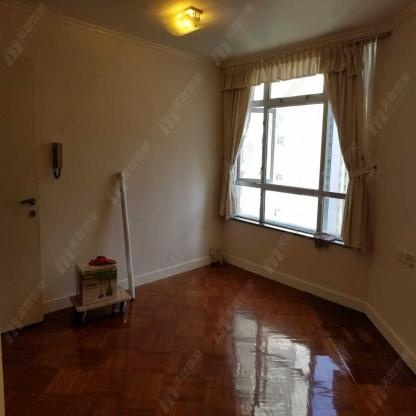

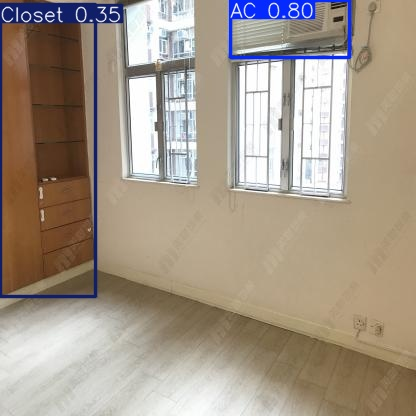

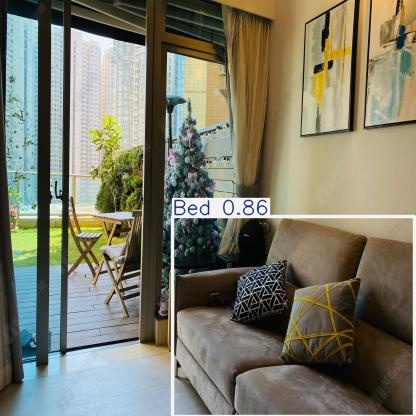

In [24]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/predict2/*.jpg')[:5]:
    display(Image(filename=imageName))
    print("\n")